# Maximum Likelihood Estimation

Given parameters $\theta$ and our data $D = (x,y)$, our goal is $p(y|x,\theta)$. But what is $\theta$?

**Maximum Likelihood Estimation (MLE)** states that the value of $\theta$ should be one that maximizes $p(y|x,\theta)$.

$$
\hat\theta = \arg\max_\theta p(y|x,\theta)
$$

## Function

Let us first define our function and generate our data.


In [1]:
import numpy as np

def gen_noise(y):
    """
    Adds random noise.
    
    Input/s:
        y       : data to add noise to
        
    Output/s:
        y_noisy : noisy y
    """
    mean, std = 0, 5.0

    noise = np.random.normal(mean, std, y.shape)
    y_noisy = y + noise
    return y_noisy
    

def fcn(x, coeffs, add_noise=False):
    """
    Given x, solves for y given x and coefficients
    
    Input/s:
        x         : ndarray of input data
        coeffs    : polynomial coefficients
        add_noise : True if we wish to add noise (default: False)
        
    Output/s:
        y         : output after evaluating function f(x) = c[0] + c[1]x + c[2]x^2
    """
    
    assert(len(coeffs) == 3)
    
    y = coeffs[0] + coeffs[1]*x + coeffs[2]*x**2
    if add_noise:
        y = gen_noise(y)
    return y

We define our input $x$ and generate $y$ using our function.

In [2]:
x_train = np.random.uniform(-10, 10, [50,1])

np.random.seed(0)
coeffs = np.random.uniform(-5, 5, [3,1])
print(coeffs)

[[0.48813504]
 [2.15189366]
 [1.02763376]]


In [3]:
y_train = fcn(x_train, coeffs, add_noise=True)

In [4]:
print(x_train.shape, y_train.shape)

(50, 1) (50, 1)


Let us try to visualize our data:

In [5]:
from matplotlib import pyplot as plt

def plotter(data, label=['train']):
    """ Plots data. """
    
    for d,l in zip(data, label):
        x, y = d
        plt.scatter(x, y, label=l)
    
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
    plt.show()

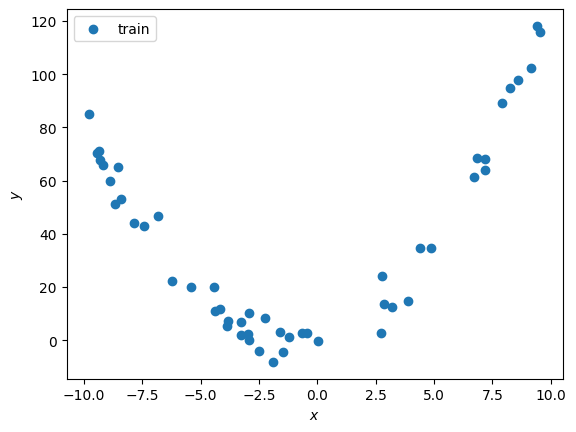

In [6]:
plotter([[x_train, y_train]])

Let us define our x_test, and y_test as well. This time, we do not add noise.

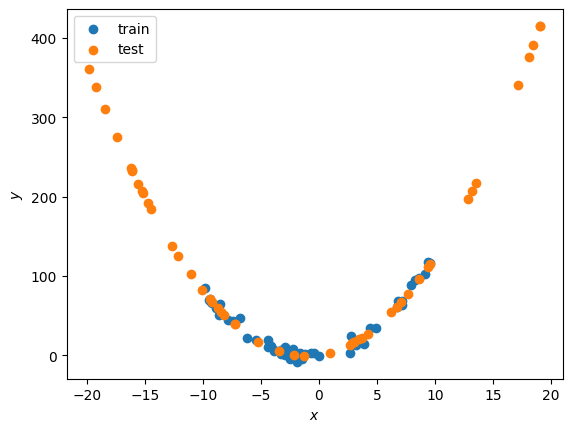

In [7]:
x_test = np.random.uniform(-20, 20, [50,1])
y_test = fcn(x_test, coeffs, add_noise=False)

plotter([[x_train, y_train],[x_test, y_test]], label=['train', 'test'])

## Finding $\theta$ using MLE

From the derivations in class, we have:

$$
\theta_{ML} = (X^TX)^{-1}X^Ty
$$

In the next section, we try to compute for $\theta_{ML}$.

However, prior to that, note that our `x`'s is a 1-d array that only represents the variable $x$. But in the equation above, we expect $X$ to be a matrix that represents $[1, x, x^2]$. Hence, we need to expand our data.


In [8]:
def expandx(x):
    """
    Expand our vector x to account our function.
    
    Input/s:
        x : 1-d array data
        
    Output/s:
        expanded_x : expanded data x
    """
    ones = np.ones(x.shape)
    expanded_x = np.hstack((ones, x))
    expanded_x = np.hstack((expanded_x, x**2))
    return expanded_x

In [9]:
x_train = expandx(x_train)
print(x_train.shape)

(50, 3)


In [10]:
# We compute for theta
theta = np.matmul(x_train.T, x_train)  # (x^Tx)
theta = np.linalg.inv(theta)           # (x^Tx)^{-1}
theta = np.matmul(theta, x_train.T)    # (x^Tx)^{-1}x^T
theta = np.matmul(theta, y_train)
print(theta)

[[0.44307781]
 [2.20010117]
 [1.04228933]]


The output $\theta$ is essentially our predicted coefficient. We try to evaluate this against our `x_test`.

In [11]:
y_pred = fcn(x_test, theta, add_noise=False)

We graphically compare the output of our approximated function using MLE vs ground truth.

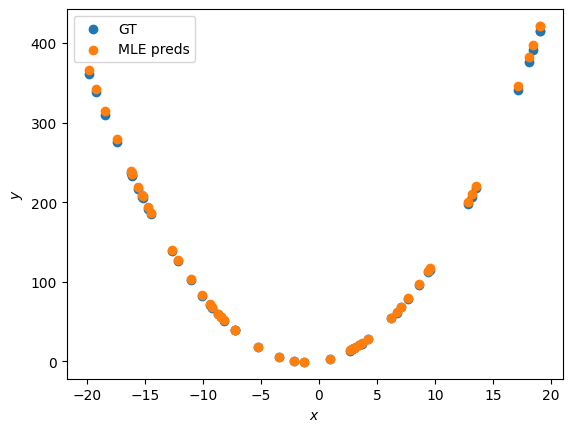

In [12]:
plotter([[x_test, y_test],[x_test, y_pred]], label=['GT', 'MLE preds'])

We use MSE for error calculation. Remember:

$$
MSE = \frac{1}{n}\sum_i(y_{pred}-y_{GT})^2
$$


In [13]:
MSE = ((y_pred-y_test)**2).mean()
print(f"MSE Loss: {MSE}")

MSE Loss: 7.050536591661835


|